In [91]:
import pandas as pd
import quandl as ql
import numpy as np
import math, datetime
import matplotlib.pyplot as plt
import pickle
from matplotlib import style
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

style.use('ggplot')

In [61]:
df = ql.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]

df.head()

Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume
Date                                                                
2004-08-19  50.159839  52.191109  48.128568   50.322842   44659000.0
2004-08-20  50.661387  54.708881  50.405597   54.322689   22834300.0
2004-08-23  55.551482  56.915693  54.693835   54.869377   18256100.0
2004-08-24  55.792225  55.972783  51.945350   52.597363   15247300.0
2004-08-25  52.542193  54.167209  52.100830   53.164113    9188600.0

In [62]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

df

Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                      
2004-08-19    50.322842  3.712563    0.324968   44659000.0
2004-08-20    54.322689  0.710922    7.227007   22834300.0
2004-08-23    54.869377  3.729433   -1.227880   18256100.0
2004-08-24    52.597363  6.417469   -5.726357   15247300.0
2004-08-25    53.164113  1.886792    1.183658    9188600.0
...                 ...       ...         ...          ...
2018-03-21  1094.000000  1.343693    0.130884    1990515.0
2018-03-22  1053.150000  2.921711   -2.487014    3418154.0
2018-03-23  1026.550000  3.918952   -2.360729    2413517.0
2018-03-26  1054.090000  0.491419    0.332191    3272409.0
2018-03-27  1006.940000  5.720301   -5.353887    2940957.0

[3424 rows x 4 columns]

In [63]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)
print(df.shape)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

(3424, 5)


Adj. Close     HL_PCT  PCT_change  Adj. Volume        label
Date                                                                    
2004-08-19    50.322842   3.712563    0.324968   44659000.0    69.078238
2004-08-20    54.322689   0.710922    7.227007   22834300.0    67.839414
2004-08-23    54.869377   3.729433   -1.227880   18256100.0    68.912727
2004-08-24    52.597363   6.417469   -5.726357   15247300.0    70.668146
2004-08-25    53.164113   1.886792    1.183658    9188600.0    71.219849
2004-08-26    54.122070   0.037068    2.820391    7094800.0    72.278116
2004-08-27    53.239345   2.326896   -1.803885    6211700.0    74.810934
2004-08-30    51.162935   3.411430   -3.106003    5196700.0    74.199045
2004-08-31    51.343492   1.308977    0.048866    4917800.0    70.462511
2004-09-01    50.280210   2.713217   -2.385589    9138200.0    74.921275
2004-09-02    50.912161   0.847207    2.442224   15118600.0    86.481962
2004-09-03    50.159839   1.729827   -0.931154    5152400.0    93.990139
2004-09-07    50.947269   0.413467    0.564301    5847500.0    91.181468
2004-09-08    51.308384   0.713587    1.548541    4985600.0    93.272925
2004-09-09    51.313400   0.390969   -0.185366    4061700.0    96.949273
2004-09-10    52.828075   1.167758    3.804080    8698800.0    95.615155
2004-09-13    53.916435   0.846512    0.815905    7844100.0    98.318500
2004-09-14    55.917612   0.457440    3.769546   10828900.0    97.736704
2004-09-15    56.173402   1.991071    1.302460   10713000.0    96.131750
2004-09-16    57.161452   1.605686    1.450952    9266300.0    92.635958
2004-09-17    58.926902   0.000000    2.683097    9472500.0    84.937193
2004-09-20    59.864797   1.876676    2.060710   10628700.0    86.542147
2004-09-21    59.102444   2.189409   -1.963394    7228700.0    84.611187
2004-09-22    59.373280   1.089711    0.791826    7581200.0    84.189886
2004-09-23    60.597057   1.498096    1.666106    8535600.0    91.793357
2004-09-24    60.100525   3.563381   -0.942382    9123400.0    91.281778
2004-09-27    59.313094   2.215457   -1.087320    7066100.0    92.721222
2004-09-28    63.626409   0.425666    4.713165   16929000.0    86.539640
2004-09-29    65.742942   3.005798    3.595985   30516400.0    86.517070
2004-09-30    65.000651   2.083333   -0.230179   13758000.0    84.029391
2004-10-01    66.495265   1.252074    1.360856   15124800.0    84.962270
2004-10-04    67.739104   1.340145   -0.158936   13022700.0    82.805613
2004-10-05    69.399229   0.115632    2.755087   14973200.0    84.019360
2004-10-06    68.752232   0.999416   -0.428561   13381400.0    87.650569
2004-10-07    69.639972   0.741808    1.676919   14115000.0    89.972737
2004-10-08    69.078238   1.415814   -0.720825   11069500.0    90.805307
2004-10-11    67.839414   2.661541   -1.277279   10472100.0    91.271747
2004-10-12    68.912727   0.152838    2.163730   11665500.0    90.258620
2004-10-13    70.668146   1.880767   -1.633622   19766200.0    89.977753
2004-10-14    71.219849   0.267606    0.694937   10442100.0    90.479301
2004-10-15    72.278116   0.964541   -0.579510   13194700.0    88.417938
2004-10-18    74.810934   0.026817    4.220235   14036300.0    85.980413
2004-10-19    74.199045   3.014736   -1.700997   18109800.0    85.253168
2004-10-20    70.462511   6.050253   -5.035825   22722600.0    86.983510
2004-10-21    74.921275   0.502075    3.642545   29149800.0    86.090754
2004-10-22    86.481962   4.488778    1.170534   73710000.0    85.488896
2004-10-25    93.990139   3.751334    6.308146   65462800.0    89.621653
2004-10-26    91.181468   5.962596   -2.493443   44569500.0    90.168341
2004-10-27    93.272925   1.908910    1.896345   26686200.0    88.508216
2004-10-28    96.949273   0.563890    3.573916   29663900.0    90.318806
2004-10-29    95.615155   4.883550   -4.138382   42282600.0    92.796454
2004-11-01    98.318500   0.836607    1.307494   24425300.0    92.159488
2004-11-02    97.736704   2.247652   -1.942334   22669900.0    93.43843

In [64]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])
print(len(X), len(y))

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     display(df.drop(['label'], 1))

3389 3389


In [65]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

print(accuracy)

0.9787140306565648


In [70]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1076.61545035 1091.43684312 1105.38711179 1099.59338041 1092.97831977
 1090.44329598 1088.95289839 1085.85925528 1079.58975176 1075.23369057
 1073.05216799 1093.38397624 1111.67691517 1115.47461931 1130.63939897
 1134.52489881 1132.85693146 1130.66294297 1132.32195989 1151.45710366
 1149.64096693 1160.00849735 1156.39475053 1164.45588308 1185.27546709
 1197.12840756 1190.83963153 1203.21700831 1208.71534188 1206.78945105
 1197.58754859 1203.07397151 1201.97814261 1137.18116073 1083.41794647] 0.9787140306565648 35


2018-02-05 00:00:00 2018-02-06 07:00:00


Adj. Close    HL_PCT  PCT_change  Adj. Volume      label  \
Date                                                                            
2004-08-19 00:00:00   50.322842  3.712563    0.324968   44659000.0  69.078238   
2004-08-20 00:00:00   54.322689  0.710922    7.227007   22834300.0  67.839414   
2004-08-23 00:00:00   54.869377  3.729433   -1.227880   18256100.0  68.912727   
2004-08-24 00:00:00   52.597363  6.417469   -5.726357   15247300.0  70.668146   
2004-08-25 00:00:00   53.164113  1.886792    1.183658    9188600.0  71.219849   
...                         ...       ...         ...          ...        ...   
2018-03-08 07:00:00         NaN       NaN         NaN          NaN        NaN   
2018-03-09 07:00:00         NaN       NaN         NaN          NaN        NaN   
2018-03-10 07:00:00         NaN       NaN         NaN          NaN        NaN   
2018-03-11 07:00:00         NaN       NaN         NaN          NaN        NaN   
2018-03-12 07:00:00         NaN       NaN         NaN          NaN        NaN   

                        Forecast  
Date                              
2004-08-19 00:00:00          NaN  
2004-08-20 00:00:00          NaN  
2004-08-23 00:00:00          NaN  
2004-08-24 00:00:00          NaN  
2004-08-25 00:00:00          NaN  
...                          ...  
2018-03-08 07:00:00  1197.587549  
2018-03-09 07:00:00  1203.073972  
2018-03-10 07:00:00  1201.978143  
2018-03-11 07:00:00  1137.181161  
2018-03-12 07:00:00  1083.417946  

[3424 rows x 6 columns]

<IPython.core.display.Javascript object>


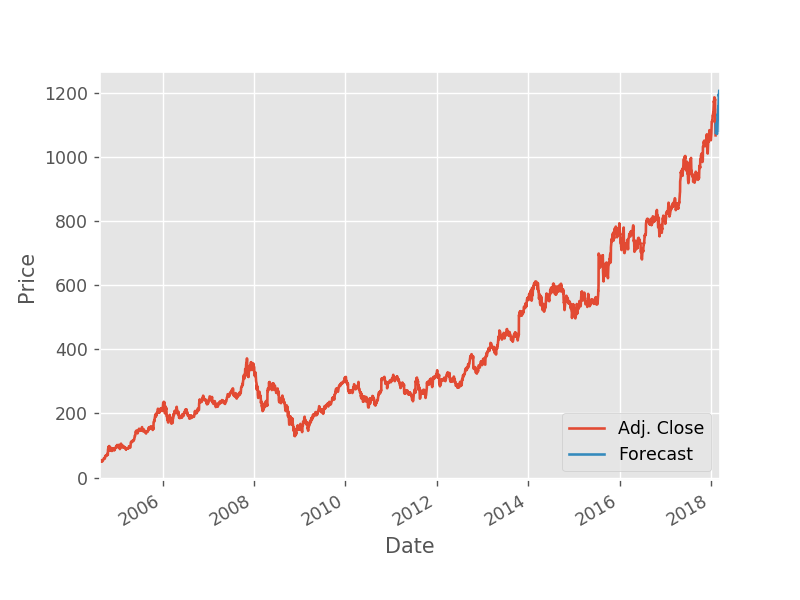

In [92]:
df['Forecast'] = np.nan
last_date = df.iloc[3388].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
print(last_date, datetime.datetime.fromtimestamp(next_unix))

for i in forecast_set: 
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

display(df)    
%matplotlib notebook
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()